## 6.1 매개변수 갱신

매개변수의 최적값을 찾는 문제를 최적화(optimization)이라고 한다.

지금까지는 손실함수의 기울기를 구해 매개변수 최적점을 찾았음.

### 6.1.2 확률적경사하강법(SGD)

학습 시 전체 데이터를 사용하는 것이 아니라, 확률적으로(랜덤으로) 단 하나의 데이터만을 이용해 경사하강법을 사용하는 것

In [1]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr

    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]

SGD의 단점

손실함수의 기울기가 손실함수가 최솟값이 되는 지점을 가리키지 않을 수도 있다.

-> SGD가 지그재그로 비효율적이게 탐색하는 등의 문제를 가져옴

-> 이를 대체하는 방법이 모멘텀, Adagrad, Adam 등이 있음.


### 6.1.4 모멘텀

모멘텀은 기존의 경사하강법에 물리학 법칙에서 따온 <관성>을 더해준다.

local minimum에 빠지더라도 기존의 관성으로 local minimum을 빠져나올 수 있다.

In [2]:
class Momentum:
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None

    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)

        for key in params.keys():
            self.v[key] = self.momentum * self.v[key] - self.lr * grads[key]
            params[key] += self.v[key]


### 6.1.5 AdaGrad

신경망 학습에서는 학습률 값이 매우 중요하다.

값이 너무 작으면 학습시간이 길어지고, 값이 너무 크면 최적점을 찾지 못하고 발산한다.

-> 학습률 감소: 학습률을 정하는 효과적인 기술

-> 학습을 진행하면서 상황에 따라 학습률을 점차 줄여가는 방식이다. 처음에는 크게 학습하다가 나중에 최적점에 다다들 때는 조금씩 작게 학습한다는 것이다.

Adagrad는 각가의 매개변수에 맞는 맞춤형 학습률을 만들어준다.

매개변수의 원소 중에서 많이 움직인(크게 갱신된) 원소는 학습률이 낮아진다는 것이다. 

In [3]:
class AdaGrad:
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None

    def update(self, params, grads):
        if self.h is None:
            self.h = {}

            for key, val in params.items():
                self.h[key] = np.zeros_like(val)

        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)
            # 1e-7 : h[key]에 0이 있는 경우 0으로 나누는 것을 방지. 이 값도 설정 가능

### 6.1.6 Adam

Adam은 모멘텀과 Adagrad를 합친 기법임.

Adam의 특징?

- 매개변수 공간을 효율적으로 탐색한다.

- 하이퍼파라미터의 편향보정이 진행된다.

## 6.2 가중치의 초깃값

가중치의 초깃값을 '잘' 설정하는 것은 학습에서 매우 중요하다.

초깃값을 모두 동일한 값으로 설정하면 오차역전파법에서 모든 가중치의 값이 똑같이 갱신되기 때문에 랜덤값으로 무작위로 설정하는 것이 좋다.

### 6.2.2 은닉층의 활성화값 분포

가중치의 초깃값에 따라 은닉층 활성화값들이 어떻게 변화하는지 살펴보자.

자주 사용되는 초깃값으로는 

- Xavier 초깃값 (선형 활성화 함수 사용시)

- He 초깃값 (Relu 활성화 함수 사용시)


이 있다.

In [4]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


x = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 활성화값을 저장

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
    w = np.random.randn(node_num, node_num) * 1
    a = np.dot(x, w)
    z = sigmoid(a)
    activations[i] = z


## 6.3 배치정규화

각 층이 활성화를 적당히 퍼뜨리도록 강제하는 것이 배치 정규화이다.

즉, 학습 과정에서 배치마다 평균과 분산을 활용하여 데이터의 분포를 정규화하는 과정을 말한다.

배치 정규화는

1. 학습을 빨리 진행할 수 있고,

2. 초깃값에 크게 의존하지 않으며,

3. 오버피팅을 억제한다(드롭아웃의 필요성 감소)

등의 이점으로 주목을 받고 있다. 


-> 데이터 분포를 정규화하는 "배치 정규화 계층"을 신경망에 삽입한다.


===========iteration:0===========
std=0.01:2.3024914166612733
Xavier:2.3110852303828318
He:2.3826335469379476
===========iteration:100===========
std=0.01:2.302571854117824
Xavier:2.250406456414674
He:1.7375869652262952
===========iteration:200===========
std=0.01:2.301755376182023
Xavier:2.087244199934429
He:0.8296478635803317
===========iteration:300===========
std=0.01:2.301285365656931
Xavier:1.6647936469578526
He:0.6168648991058496
===========iteration:400===========
std=0.01:2.300690089690127
Xavier:1.1086071987185466
He:0.5487910909482272
===========iteration:500===========
std=0.01:2.2996706803318956
Xavier:0.7115132479798756
He:0.3031091751432847
===========iteration:600===========
std=0.01:2.3050178118295137
Xavier:0.5878083878247866
He:0.28820161604612304
===========iteration:700===========
std=0.01:2.3007662145282137
Xavier:0.5618389508779185
He:0.29465756011187666
===========iteration:800===========
std=0.01:2.30237951472727
Xavier:0.48759886358172716
He:0.3724839150923215

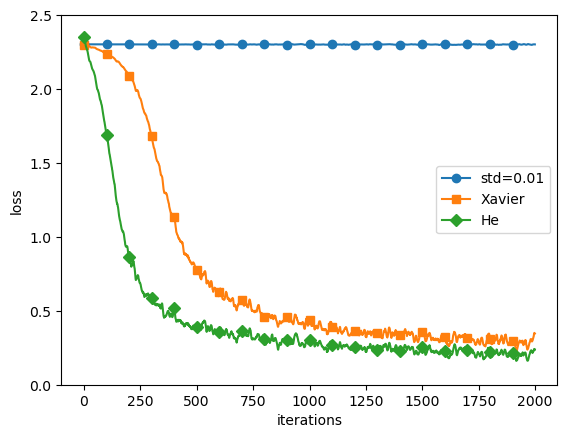

In [5]:
import os
import sys

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()

epoch:0, train acc:0.11, test acc:0.1184
epoch:1, train acc:0.12666666666666668, test acc:0.1244
epoch:2, train acc:0.15666666666666668, test acc:0.1358
epoch:3, train acc:0.19, test acc:0.1512
epoch:4, train acc:0.23, test acc:0.1757
epoch:5, train acc:0.25, test acc:0.1901
epoch:6, train acc:0.26666666666666666, test acc:0.2143
epoch:7, train acc:0.2966666666666667, test acc:0.2275
epoch:8, train acc:0.2866666666666667, test acc:0.2308
epoch:9, train acc:0.3433333333333333, test acc:0.2523
epoch:10, train acc:0.37666666666666665, test acc:0.2709
epoch:11, train acc:0.4, test acc:0.2853
epoch:12, train acc:0.4033333333333333, test acc:0.2937
epoch:13, train acc:0.42333333333333334, test acc:0.3094
epoch:14, train acc:0.43, test acc:0.3219
epoch:15, train acc:0.4533333333333333, test acc:0.3342
epoch:16, train acc:0.48, test acc:0.3565
epoch:17, train acc:0.5033333333333333, test acc:0.3771
epoch:18, train acc:0.53, test acc:0.3959
epoch:19, train acc:0.5466666666666666, test acc:0.414

epoch:168, train acc:1.0, test acc:0.7538
epoch:169, train acc:1.0, test acc:0.7537
epoch:170, train acc:1.0, test acc:0.7546
epoch:171, train acc:1.0, test acc:0.7534
epoch:172, train acc:1.0, test acc:0.7538
epoch:173, train acc:1.0, test acc:0.7539
epoch:174, train acc:1.0, test acc:0.7539
epoch:175, train acc:1.0, test acc:0.7536
epoch:176, train acc:1.0, test acc:0.7535
epoch:177, train acc:1.0, test acc:0.7554
epoch:178, train acc:1.0, test acc:0.7535
epoch:179, train acc:1.0, test acc:0.7527
epoch:180, train acc:1.0, test acc:0.7527
epoch:181, train acc:1.0, test acc:0.7539
epoch:182, train acc:1.0, test acc:0.7527
epoch:183, train acc:1.0, test acc:0.753
epoch:184, train acc:1.0, test acc:0.7533
epoch:185, train acc:1.0, test acc:0.7534
epoch:186, train acc:1.0, test acc:0.7538
epoch:187, train acc:1.0, test acc:0.7548
epoch:188, train acc:1.0, test acc:0.7536
epoch:189, train acc:1.0, test acc:0.7538
epoch:190, train acc:1.0, test acc:0.7541
epoch:191, train acc:1.0, test acc:

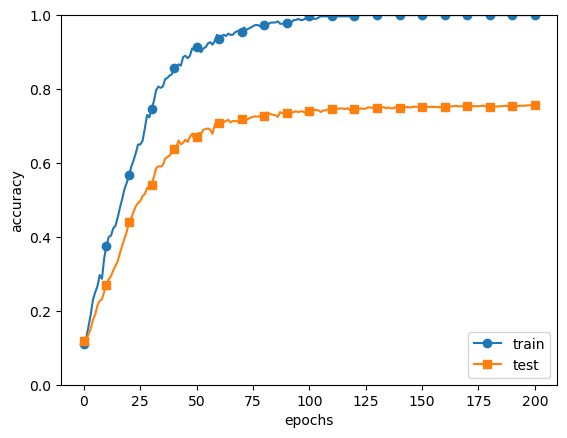

In [6]:
import os
import sys
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD
from common.util import shuffle_dataset

# 6.4.1 오버피팅
"""
오버피팅은 주로 다음의 경우에 일어난다.
 * 매개변수가 많고 표현력이 높은 모델
 * 훈련 데이터가 적음

강제로 오버피팅을 만들기 위해 MNIST 데이터 셋 중 300개만 사용하고 7층 네트워크를 사용해
복잡성을 높인다. 각 층의 뉴런은 100개, 활성화 함수는 ReLU.
"""


(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（가중치 감쇠） 설정 =======================
weight_decay_lambda = 0  # weight decay를 사용하지 않을 경우
# weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784,
                        hidden_size_list=[100, 100, 100, 100, 100, 100],
                        output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01)  # 학습률이 0.01인 SGD로 매개변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc)
              + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()


### 6.4.3 드롭아웃

드롭아웃이란,

뉴런을 임의로 삭제하면서 학습하는 방법

훈련 때 은닉층의 뉴런을 무작위로 골라서 삭제한다.

-> 삭제된 뉴런은 신호를 전달하지 않게 된다.

훈련 때는 데이터를 흘릴 때마다 무작위로 삭제할 뉴런을 선택하고,

시험 때는 모든 뉴런에 신호를 전달한다.

In [7]:
class Dropout:
    """
    순전파 때마다 mask에 삭제할 뉴런을 False로 표시한다. mask는 x와 같은 형상의 무작위 배열을
    생성하고 그 값이 dropout_ratio보다 큰 원소만 True로 설정한다.
    역전파 때의 동작은 ReLU와 같다.
    """
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None

    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)

    def backward(self, dout):
        return dout * self.mask

-> 훈련 / 시험 데이터에 대한 정확도 차이가 줄고,

훈련 데이터에 대한 정확도가 100% 도달하지 않게 된다.

## 6.5 적절한 하이퍼파라미터 값 찾기

하이퍼파라미터?

ex) 각 층의 뉴런 수, 배치크기, 매개변수 갱신 시의 학습률과 가중치 감소


### 6.5.1 검증데이터

일반적으로 하이퍼파라미터 값을 찾을 때는 학습/시험 데이터로 수행하지 않고

validation set을 만든다.

-> 하이퍼파라미터 전용 확인 데이터


### 6.5.2 하이퍼파라미터 최적화

1. 하이퍼파라미터 값의 범위 설정

2. 설정된 범위에서 하이퍼파라미터 값을 무작위로 추출

(신경망의 하이퍼파라미터 최적화에서는 그리드 서치 같은 규칙적인 탐색보다 무작위로 샘플링해 탐색하는 편이 좋다고 알려짐.)

3. 2단계에서 샘플링한 하이퍼파라미터 값을 사용하여 학습, validation set으로 성능평가(빠른 속도를 위해 에폭은 작게 설정)

4. 2,3단계를 특정 횟수로 반복하며 정확도를 보고 하이퍼파라미터의 범위를 좁혀나간다.

val acc:0.05 | lr:0.000175268504399903, weight decay:1.1341407937137812e-05
val acc:0.33 | lr:0.0013198844349961846, weight decay:1.9414007756097584e-08
val acc:0.1 | lr:1.622721302072471e-06, weight decay:1.0599626712706517e-08
val acc:0.06 | lr:3.0387650803979642e-05, weight decay:9.623566591125661e-07
val acc:0.71 | lr:0.006362347490957896, weight decay:1.0134620238372648e-08
val acc:0.64 | lr:0.004478662343536887, weight decay:4.336759587667497e-05
val acc:0.17 | lr:4.4943415497685716e-05, weight decay:1.722754214586023e-05
val acc:0.06 | lr:6.036088447455745e-06, weight decay:6.660948490757115e-05
val acc:0.11 | lr:3.194861447893197e-06, weight decay:4.506398847589391e-06
val acc:0.11 | lr:0.00075150282051428, weight decay:4.34771950908342e-05
val acc:0.12 | lr:5.614293724880416e-05, weight decay:1.5255040709556617e-08
val acc:0.08 | lr:7.83805680627364e-05, weight decay:3.0746319879760084e-05
val acc:0.75 | lr:0.004637972056527781, weight decay:2.6319529546920613e-08
val acc:0.38

Best-9(val acc:0.56) | lr:0.003400631994850852, weight decay:4.01614548867987e-06
Best-10(val acc:0.51) | lr:0.003398761011928398, weight decay:1.4719466276400225e-08
Best-11(val acc:0.5) | lr:0.0038389127872114066, weight decay:2.2304002852084456e-05
Best-12(val acc:0.5) | lr:0.0033745648834291007, weight decay:4.174970234187528e-06
Best-13(val acc:0.38) | lr:0.003985123200831589, weight decay:5.277760553448894e-06
Best-14(val acc:0.38) | lr:0.00241017709734434, weight decay:3.7815737868862923e-08
Best-15(val acc:0.36) | lr:0.002731679681086166, weight decay:5.222958857337027e-05
Best-16(val acc:0.34) | lr:0.0011335762637664046, weight decay:6.694087857186103e-07
Best-17(val acc:0.33) | lr:0.0013198844349961846, weight decay:1.9414007756097584e-08
Best-18(val acc:0.31) | lr:0.0017426603915483006, weight decay:5.117074063543395e-08
Best-19(val acc:0.3) | lr:0.001677286915889647, weight decay:6.928047475135984e-06
Best-20(val acc:0.29) | lr:0.0014137749707022382, weight decay:3.54073709

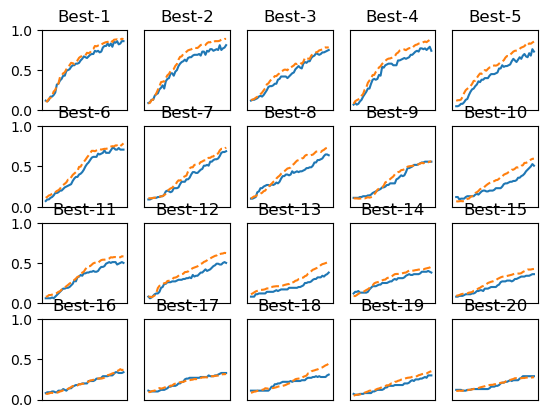

In [8]:
import sys
import os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.util import shuffle_dataset
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 결과를 빠르게 얻기 위해 훈련 데이터를 줄임
x_train = x_train[:500]
t_train = t_train[:500]

# 20%를 검증 데이터로 분할
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]


def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784,
                            hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd',
                      optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list


# 하이퍼파라미터 무작위 탐색======================================
optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    # 탐색한 하이퍼파라미터의 범위 지정===============
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    # ================================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

# 그래프 그리기========================================================
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

for key, val_acc_list in sorted(results_val.items(), key=lambda x: x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5:
        plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], "--")
    i += 1

    if i >= graph_draw_num:
        break

plt.show()

학습이 잘 진행될 때의 학습률은 0.001~0.01

가중치 감소 계수는 10^-8 ~ 10^-6

## 6.6 정리

1. 매개변수 갱신 방법에는 SGD(확률적 경사하강법), 모멘텀, Adagrad, Adam 등이 있음

2. 가중치 초깃값을 잘 정하는 것은 올바른 학습을 위해 매우 중요하다.

3. 가중치의 초깃값으로는 Xavier 초깃값과 He 초깃값이 효과적이다.

4. 배치정규화를 이용하며 학습을 빠르게 진행할 수 있고, 초깃값에 영향을 덜 받게 된다.

5. 오버피팅을 억제하는 정규화 기술로 가중치 감소와 드롭아웃 등이 있다.

6. 하이퍼파라미터 값 탐색은 최적값이 존재할만한 범위를 점차 좁히면서 하는 것이 효과적이다.